# Media Usage by Age

###### Eva Micomonaco

7/13/2023-8/3/2023

## Project Purpose
To see what type of media is used most by each age.

## Data 
1. Reading Data: Wylie Communications [Reading Data](https://www.wyliecomm.com/2021/07/whats-the-average-time-spent-reading-statistics)  
2. Television Data: Statista [Television Data](https://www.statista.com/statistics/411775/average-daily-time-watching-tv-us-by-age/)  
3. Music Data: Musicbiz [Music Data](https://musicbiz.org/wp-content/uploads/2018/09/AM_US_2018_V5.pdf) page 11 
4. Social Media Data: Kaggle [Social Media Data](https://www.kaggle.com/datasets/earthian/daily-socialmedia-engagement)

First, I imported the plotting and fitting modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

## Reading

In [3]:
age = [15,20,25,35,45,55,65,75]
reading_time = [7.8,6,7.2,9.6,15,16.8,31.8,43.8]

In [4]:
df = pd.DataFrame({'x': age,
                   'y': reading_time})


Then I plotted all three media forms with best fit lines to see the patterns

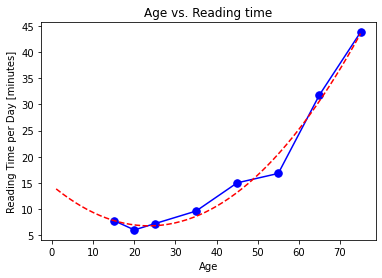

The equation of this line is:
         2
0.01389 x - 0.6542 x + 14.48


In [5]:
plt.plot(age,reading_time,'b.',markersize = 15)
plt.plot(age,reading_time,'b-')
plt.xlabel('Age')
plt.ylabel('Reading Time per Day [minutes]')
plt.title("Age vs. Reading time")

#fit second-degree polynomial
model2 = np.poly1d(np.polyfit(df.x, df.y, 2))

#define scatterplot
polyline = np.linspace(1, 75, 50)
plt.scatter(df.x, df.y)

#add fitted polynomial curve to scatterplot
plt.plot(polyline, model2(polyline), '--', color='red')
plt.show()

#print equation
print('The equation of this line is:')
print(model2)

The reading time increases exponentially

## Television

In [6]:
tv_time = [117.6,121.2,129.6,125.4,153,199.8,258,288]

In [7]:
dtv = pd.DataFrame({'x': age,
                   'y': tv_time})

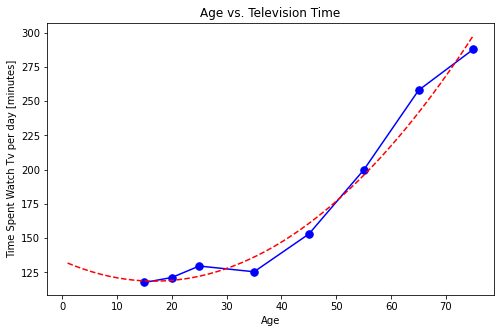

The equation of this line is:
         2
0.05299 x - 1.779 x + 133.5


In [8]:
plt.figure(figsize = (8,5))
plt.plot(age,tv_time,'b.',markersize = 15)
plt.plot(age,tv_time,'b-')
plt.xlabel('Age')
plt.ylabel('Time Spent Watch Tv per day [minutes]')
plt.title("Age vs. Television Time")

#fit forth-degree polynomial
model_tv = np.poly1d(np.polyfit(dtv.x, dtv.y, 2))

#define scatterplot
polyline = np.linspace(1, 75, 50)
plt.scatter(dtv.x, dtv.y)

#add fitted polynomial curve to scatterplot
plt.plot(polyline, model_tv(polyline), '--', color='red')
plt.show()

#print equation
print('The equation of this line is:')
print(model_tv)

The television time stays the same until 35 and then increases by 25-50 minutes each 10 years

## Music

In [9]:
music_time = [175,175,156,159,140,141,109,109]

In [10]:
dmus = pd.DataFrame({'x': age,
                   'y': music_time})

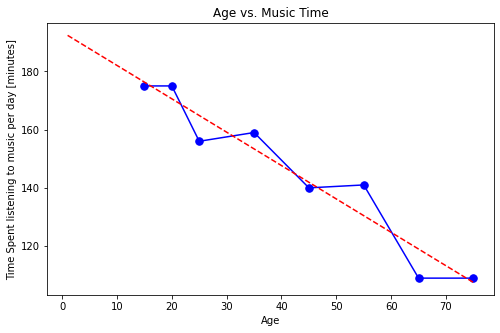

The equation of this line is:
 
-1.147 x + 193.5


In [24]:
plt.figure(figsize = (8,5))
plt.plot(age,music_time,'b.',markersize = 15)
plt.plot(age,music_time,'b-')
plt.xlabel('Age')
plt.ylabel('Time Spent listening to music per day [minutes]')
plt.title("Age vs. Music Time")

#fit sixth-degree polynomial
model_mus = np.poly1d(np.polyfit(dmus.x, dmus.y, 1))

#define scatterplot
polyline = np.linspace(1, 75, 50)
plt.scatter(dmus.x, dmus.y)

#add fitted polynomial curve to scatterplot
plt.plot(polyline, model_mus(polyline), '--', color='red')
plt.show()

#print equation
print('The equation of this line is:')
print(model_mus)

The music time stays the same for ten years the decreases by 30-40 minutes

## Social Media

After making three graphs, I decided to try something new with this one and import a 1000 point data set.

First I imported the data set and asigned them to lists

In [12]:
d_sm = pd.read_csv('Social Media Data.csv')

In [13]:
age_sm = d_sm["age"]

In [14]:
time_sm = d_sm["TotalEngagement"].mul(60)

I multiplied the time by 60 to convert from hours to minutes like the rest of my data

### Cleaning the Data

The data had about 20 values for each age so I wanted to find the average for each age

First I made a frequency table for age using a dictionary

In [15]:
freq_age = {}
for age_answer in age_sm:
    if age_answer not in freq_age:
        freq_age[age_answer]= 1
    else:
        freq_age[age_answer]+= 1
    
#freq_age

Then I made a dictionary with the total time for each age.

In [16]:
sum_time = {}
for idx in range(len(time_sm)):
    if age_sm[idx] not in sum_time:
        sum_time[age_sm[idx]]= time_sm[idx]
    else:
        sum_time[age_sm[idx]]+= time_sm[idx]
#sum_time

Then I made a list of the age so I could graph it.

In [17]:
ageList = []
for key in sum_time:
    ageList.append(key)
#ageList

Next, I found the average time for each age.

In [18]:
avg_time = []
for key in ageList:
    ave = sum_time[key]/freq_age[key]
    avg_time.append(ave)
#avg_time

### Graph

Finally I made a scatterplot of the values

Text(0.5, 1.0, 'Social Media Time vs. Age')

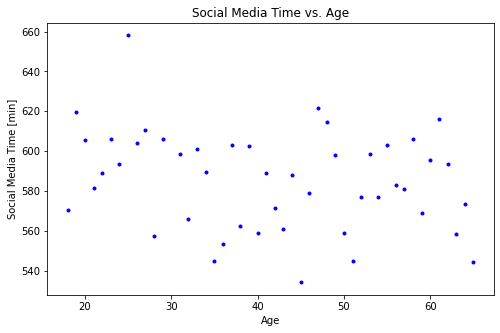

In [19]:
plt.figure(figsize = (8,5))
plt.plot(ageList,avg_time,'b.')
plt.xlabel('Age')
plt.ylabel('Social Media Time [min]')
plt.title("Social Media Time vs. Age")

In this graph there is no real pattern except most of the values are around 580-600 minutes and time decreases around 60

Then I made a list of the values that were at the same ages as the other sets of data so I could plot them together

In [20]:
sm_age = [20,25,31,35,40,45,50,55,60]
sm_time_plot = []
for age_list in sm_age:
    x = sum_time[age_list]/freq_age[age_list]
    sm_time_plot.append(x)
#sm_time_plot

Then I plotted all four together to see which was most popular with each age group

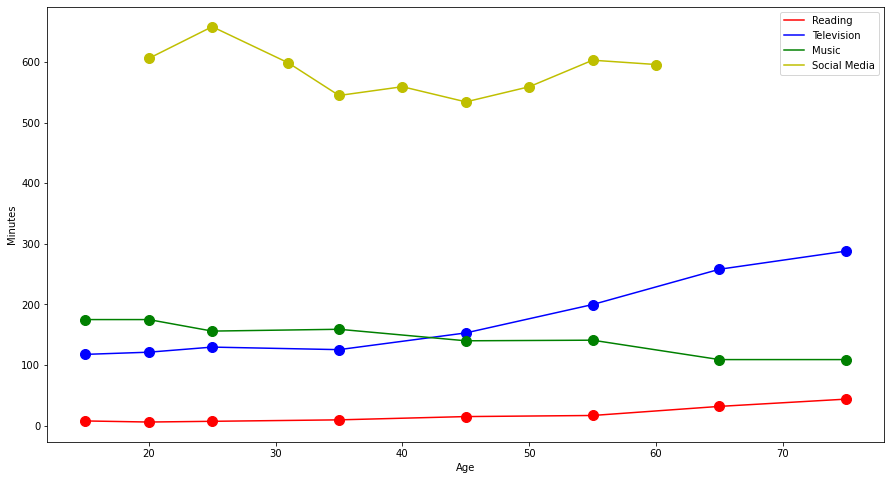

In [23]:
plt.figure(figsize = (15,8))
plt.plot(age,reading_time,'r.',markersize = 20)
plt.plot(age,reading_time,'r-',label='Reading')

plt.plot(age,tv_time,'b.',markersize = 20)
plt.plot(age,tv_time,'b-',label='Television')

plt.plot(age,music_time,'g.',markersize = 20)
plt.plot(age,music_time,'g-',label='Music')
         
plt.plot(sm_age,sm_time_plot,'y.',markersize = 20)
plt.plot(sm_age,sm_time_plot,'y-',label='Social Media')

plt.xlabel('Age')
plt.ylabel('Minutes')
plt.legend()
plt.show()


From this graph, we can deduce that social media is by far the most popular media form.

After social media, music is the most popular with people under 45 and television is the popular with those older.